## 3. Khám phá dữ liệu

### Dataset overview 
#### Basic Information

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import skew, kurtosis


data_path = os.path.join('..', 'data', 'raw', 'netflix_titles.csv')
df = pd.read_csv(data_path)


In [21]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [22]:
print("Số dòng:", df.shape[0])
print("Số cột:", df.shape[1])
print("\nCác cột trong dataset:")
print(df.columns.tolist())
size_mb = os.path.getsize(data_path) / (1024**2)
print(f"Dataset size: {size_mb:.2f} MB")

Số dòng: 8807
Số cột: 12

Các cột trong dataset:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
Dataset size: 3.25 MB


Mỗi dòng của dữ liệu đại diện cho một bộ phim cũng như các thông tin cho bộ phim đó trên nexflix

#### Data Integrity

In [23]:
print("Số dòng bị trùng lặp:", df.duplicated().sum())

print("\nSố lượng giá trị bị thiếu trong mỗi cột:")
print(df.isnull().sum())

Số dòng bị trùng lặp: 0

Số lượng giá trị bị thiếu trong mỗi cột:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


Có thể thấy bộ dữ liệu này không có dữ liệu bị trùng nhưng lại thiếu kha khá dữ liệu nhất là ở cột đạo diễn, diễn viên tham gia phim này và cả quốc gia của bộ phim đó

In [24]:
empty_rows = df.isna().all(axis=1).sum()
print("Số dòng hoàn toàn trống:", empty_rows)

Số dòng hoàn toàn trống: 0


#### Column Inventory

In [25]:
list(df.columns.values)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

| Cột | Ý nghĩa |
|-----|---------|
| `show_id` | ID duy nhất của phim/show |
| `type` |  Loại nội dung: "Movie" hoặc "TV Show" |
| `title` |  Tên phim/chương trình |
| `director` |  Đạo diễn (có thể NaN với TV Show) |
| `cast` | Diễn viên (danh sách cách nhau bởi ", ") |
| `country` |  Quốc gia sản xuất |
| `date_added` |  Ngày thêm vào Netflix (format: "Month dd, yyyy") |
| `release_year` |  Năm phát hành |
| `rating` | Đánh giá độ tuổi (TV-MA, PG-13, v.v.) |
| `duration` | Thời lượng: "X seasons" (TV) hoặc "X min" (Movie) |
| `listed_in` |  Thể loại/chủ đề (có thể nhiều: "Dramas, International Movies") |
| `description` |  Mô tả nội dung |


**Các cột có tiềm năng để phân tích:**
- type
- country
- listed_in
- rating
- release_year
- date_added
- duration
- director
- cast
- description

**Các cột cân nhắc loại bỏ:**
- show_id: đây là cột định danh không có giá trị để phân tích hay mang ý nghĩa thống kê
=>Sẽ được loại bỏ trong notebook *02_Data_Cleaning*


In [26]:
df = df.drop(columns=['show_id'])

#### Data Types

In [27]:
df.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

**Các cột có kiểu dữ liệu không thích hợp:**
- `duration`: thời lượng phim nên chuyển dang kiểu int, nếu phim thuộc loại Movie thì đại diện cho số phút, nếu thuộc loại TV Show thì đó là số mùa phim
- `date_added`: nên chuyển sang kiể dữ liệu ngày tháng

Cả hai cột này đều cần chuyển đổi sang dạng dữ liệu thích hợp => Thực hiện trong notebook *02_Data_Cleaning*

In [28]:
# Chuyển cột `duration` sang số (lấy phần số)
df['duration'] = df['duration'].astype(str).str.extract('([0-9]+)')
df['duration'] = df['duration'].astype('Int64')
# Chuẩn hóa `date_added` (loại bỏ format không hợp lệ)
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

### Numerical Columns Analysis 

#### Phân phối dữ liệu và khuynh hướng trung tâm


--- Movie (phút) ---
Mean: 99.58 | Median: 98.00 | Std: 28.29


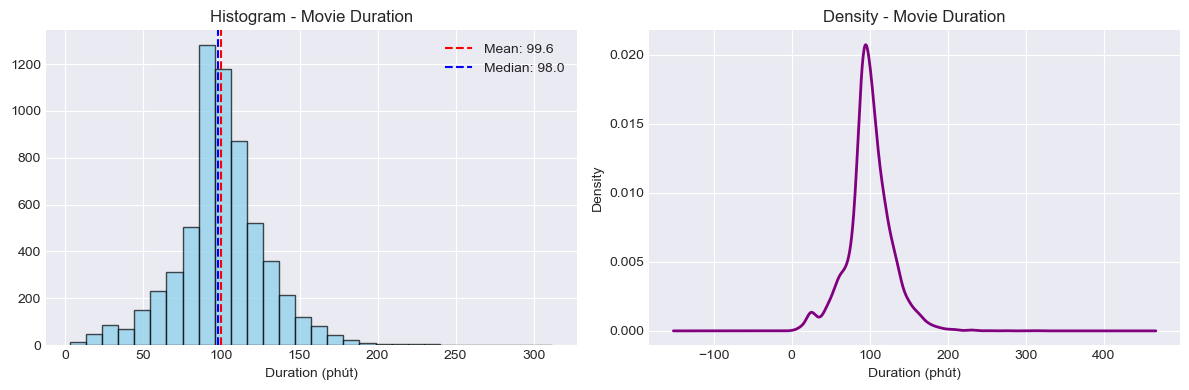


--- TV Show (mùa) ---
Mean: 1.76 | Median: 1.00 | Std: 1.58


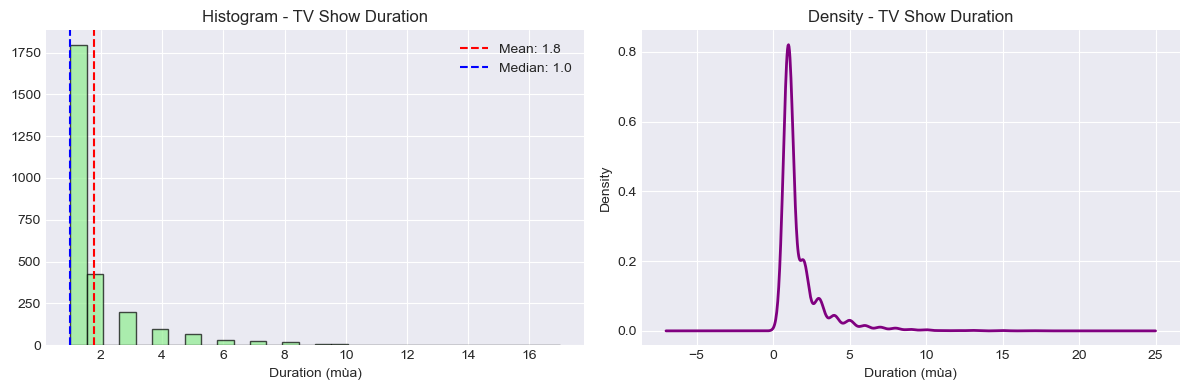


PHÂN TÍCH CỘT: RELEASE_YEAR
Mean: 2014.18 | Median: 2017.00 | Std: 8.82
Skewness: -3.45 | Kurtosis: 16.22


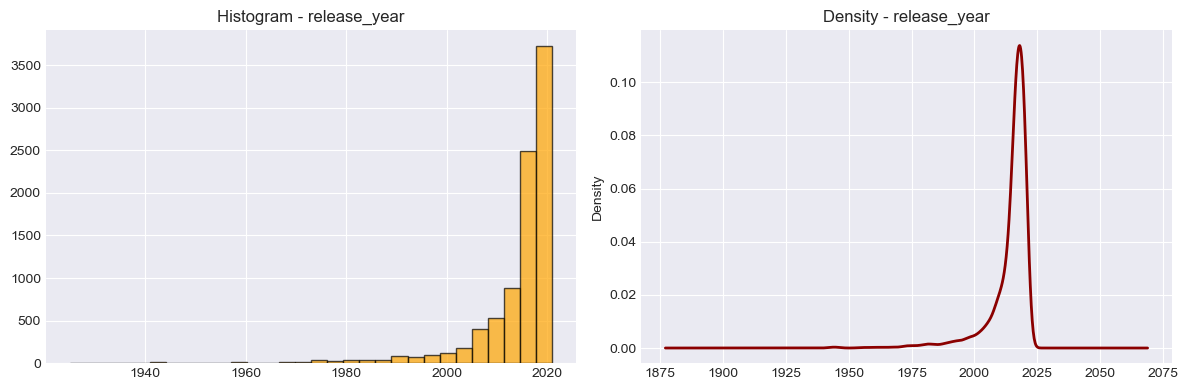

In [29]:
# Các cột số cần phân tích
num_cols = ['duration', 'release_year']

for col in num_cols:
	if col not in df.columns:
		continue
	# Xử lý đặc biệt cho cột duration: Tách riêng Movie và TV Show
	if col == 'duration':        
		for content_type in ['Movie', 'TV Show']:
			# Lọc dữ liệu theo loại
			subset = df[df['type'] == content_type][col].dropna().astype(float)
			
			if subset.empty:
					print(f"\n{content_type}: Không có dữ liệu để phân tích.")
					continue
					
			mean_val = subset.mean()
			median_val = subset.median()
			std_val = subset.std()
			
			
			unit = "phút" if content_type == 'Movie' else "mùa"
			
			print(f"\n--- {content_type} ({unit}) ---")
			print(f"Mean: {mean_val:.2f} | Median: {median_val:.2f} | Std: {std_val:.2f}")
			
			
			# Vẽ biểu đồ cho từng loại
			fig, axes = plt.subplots(1, 2, figsize=(12, 4))
			
			# Histogram
			axes[0].hist(subset, bins=30, color='skyblue' if content_type=='Movie' else 'lightgreen', 
										edgecolor='black', alpha=0.7)
			axes[0].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
			axes[0].axvline(median_val, color='blue', linestyle='--', label=f'Median: {median_val:.1f}')
			axes[0].set_title(f'Histogram - {content_type} Duration')
			axes[0].set_xlabel(f'Duration ({unit})')
			axes[0].legend()
			
			# Density
			subset.plot(kind='density', ax=axes[1], color='purple', linewidth=2)
			axes[1].set_title(f'Density - {content_type} Duration')
			axes[1].set_xlabel(f'Duration ({unit})')
			
			plt.tight_layout()
			plt.show()
					
	else:
		# Xử lý chung cho các cột khác (như release_year)
		data = df[col].dropna().astype(float)
		
		if data.empty:
			continue
				
		mean_val = data.mean()
		median_val = data.median()
		std_val = data.std()
		skew_val = skew(data)
		kurt_val = kurtosis(data)
		
		print(f"\n{'='*60}")
		print(f"PHÂN TÍCH CỘT: {col.upper()}")
		print(f"{'='*60}")
		print(f"Mean: {mean_val:.2f} | Median: {median_val:.2f} | Std: {std_val:.2f}")
		print(f"Skewness: {skew_val:.2f} | Kurtosis: {kurt_val:.2f}")
		
		# Vẽ biểu đồ chung
		fig, axes = plt.subplots(1, 2, figsize=(12, 4))
		axes[0].hist(data, bins=30, color='orange', edgecolor='black', alpha=0.7)
		axes[0].set_title(f'Histogram - {col}')
		
		data.plot(kind='density', ax=axes[1], color='darkred', linewidth=2)
		axes[1].set_title(f'Density - {col}')
		
		plt.tight_layout()
		plt.show()

Dựa trên các biểu đồ và chỉ số thống kê ở trên, ta có các nhận xét sau:

1.  **Duration (Thời lượng):**
    *   **Movies (Phim lẻ):** Phân phối có dạng **gần chuẩn (Normal distribution)** nhưng hơi lệch phải. Phần lớn phim có thời lượng tập trung quanh mức trung bình (khoảng 90-110 phút).
    *   **TV Shows (Phim bộ):** Phân phối **lệch phải mạnh**. Đa số các bộ phim chỉ có 1 mùa (Season 1), số lượng phim có nhiều mùa giảm dần nhanh chóng.

2.  **Release Year (Năm phát hành):**
    *   Phân phối **lệch trái mạnh**.
    *   Dữ liệu tập trung chủ yếu vào những năm gần đây (từ 2015-2021), phản ánh chiến lược tập trung vào nội dung mới và sự bùng nổ của Netflix trong thập kỷ qua. Số lượng phim cũ (trước năm 2000) chiếm tỷ lệ rất nhỏ.

#### Range & Outliers: 

In [30]:
cols_to_analyze = ['duration']

print(f"{'Type':<10} | {'Column':<15} | {'Min':<10} | {'Max':<10}")
print("-" * 55)

for col in cols_to_analyze:
	if col not in df.columns:
		continue
			
	for content_type in ['Movie', 'TV Show']:
		# Lọc dữ liệu theo loại và chuyển sang kiểu số thực để tính toán
		subset = df[df['type'] == content_type][col].dropna().astype(float)
		
		if not subset.empty:
			print(f"{content_type:<10} | {col:<15} | {subset.min():<10.0f} | {subset.max():<10.0f}")

print("-" * 55)
print("min và max của release_year:")
print("min :", df['release_year'].min(), " max :", df['release_year'].max())


Type       | Column          | Min        | Max       
-------------------------------------------------------
Movie      | duration        | 3          | 312       
TV Show    | duration        | 1          | 17        
-------------------------------------------------------
min và max của release_year:
min : 1925  max : 2021


In [31]:
# Xác định outliers bằng phương pháp IQR (Interquartile Range)
def analyze_outliers_iqr(data, col_name, group_name="All"):
	if data.empty: return
	
	Q1 = data.quantile(0.25)
	Q3 = data.quantile(0.75)
	IQR = Q3 - Q1
	lower_bound = Q1 - 1.5 * IQR
	upper_bound = Q3 + 1.5 * IQR
	
	outliers = data[(data < lower_bound) | (data > upper_bound)]
	
	print(f"--- {group_name} : {col_name} ---")
	print(f"Q1: {Q1:.1f}, Q3: {Q3:.1f}, IQR: {IQR:.1f}")
	print(f"Lower Bound: {lower_bound:.1f}, Upper Bound: {upper_bound:.1f}")
	print(f"Số lượng outliers: {len(outliers)} ({len(outliers)/len(data)*100:.1f}%)")
	if not outliers.empty:
		print(f"Min outlier: {outliers.min()}, Max outlier: {outliers.max()}")
	print("")

# 1. Duration - Movies
movies_duration = df[df['type'] == 'Movie']['duration'].dropna().astype(float)
analyze_outliers_iqr(movies_duration, 'duration', 'Movies')

# 2. Duration - TV Shows
tv_duration = df[df['type'] == 'TV Show']['duration'].dropna().astype(float)
analyze_outliers_iqr(tv_duration, 'duration', 'TV Shows')

# 3. Release Year
release_year = df['release_year'].dropna()
analyze_outliers_iqr(release_year, 'release_year')

--- Movies : duration ---
Q1: 87.0, Q3: 114.0, IQR: 27.0
Lower Bound: 46.5, Upper Bound: 154.5
Số lượng outliers: 450 (7.3%)
Min outlier: 3.0, Max outlier: 312.0

--- TV Shows : duration ---
Q1: 1.0, Q3: 2.0, IQR: 1.0
Lower Bound: -0.5, Upper Bound: 3.5
Số lượng outliers: 259 (9.7%)
Min outlier: 4.0, Max outlier: 17.0

--- All : release_year ---
Q1: 2013.0, Q3: 2019.0, IQR: 6.0
Lower Bound: 2004.0, Upper Bound: 2028.0
Số lượng outliers: 719 (8.2%)
Min outlier: 1925, Max outlier: 2003



Nhìn chung các giá trị min max của các kiểu dữ liệu số này là bình thường đối với chủ đề film ảnh

#### Chất lượng dữ liệu

In [32]:
for col in num_cols:
	missing_count = df[col].isnull().sum()
	total_count = len(df)
	missing_ratio = missing_count / total_count
	print(f"Cột '{col}': {missing_count} giá trị bị thiếu ({missing_ratio:.2%})")


# Kiểm tra giá trị không hợp lý (Impossible Values)
print("\nKIỂM TRA GIÁ TRỊ KHÔNG HỢP LÝ")

invalid_years = df[(df['release_year'] < 1888) | (df['release_year'] > 2025)]
print(f"- Năm phát hành không hợp lý (<1888 hoặc >2025): {len(invalid_years)} dòng")

# Kiểm tra thời lượng: Phải lớn hơn 0
if 'duration' in df.columns:
	invalid_duration = df[df['duration'] <= 0]
	print(f"- Thời lượng <= 0: {len(invalid_duration)} dòng")

# Kiểm tra giá trị giữ chỗ (Placeholder Values)
print("\nKIỂM TRA GIÁ TRỊ GIỮ CHỖ (PLACEHOLDERS)")
placeholders = [0, -1, 999, 9999]
check_cols = ['release_year', 'duration']

for col in check_cols:
	if col in df.columns:
		count = df[df[col].isin(placeholders)].shape[0]
		if count > 0:
			print(f"- Cột '{col}' có {count} dòng chứa giá trị nghi ngờ là placeholder {placeholders}")
		else:
			print(f"- Cột '{col}': Không phát hiện placeholder thường gặp (0, -1, 999...).")

Cột 'duration': 3 giá trị bị thiếu (0.03%)
Cột 'release_year': 0 giá trị bị thiếu (0.00%)

KIỂM TRA GIÁ TRỊ KHÔNG HỢP LÝ
- Năm phát hành không hợp lý (<1888 hoặc >2025): 0 dòng
- Thời lượng <= 0: 0 dòng

KIỂM TRA GIÁ TRỊ GIỮ CHỖ (PLACEHOLDERS)
- Cột 'release_year': Không phát hiện placeholder thường gặp (0, -1, 999...).
- Cột 'duration': Không phát hiện placeholder thường gặp (0, -1, 999...).


Dựa trên kết quả kiểm tra từ đoạn code trên:

1.  **Missing Values (Giá trị bị thiếu):**
    *   Cột duration chiếm tỉ lệ thấp(0,03%) ở mức chấp nhận được

2.  **Validity (Tính hợp lý):**
    *   **Năm phát hành:** Tất cả đều nằm trong khoảng thời gian hợp lý của lịch sử điện ảnh (không có năm < 1888 hay > 2025).
    *   **Thời lượng:** Không có bộ phim nào có thời lượng $\le 0$, đảm bảo tính chính xác của dữ liệu số.

3.  **Placeholders (Giá trị giữ chỗ):**
    *   Không phát hiện các giá trị giữ chỗ mặc định thường gặp (như 0, -1, 999) trong các cột số, cho thấy dữ liệu được thu thập thực tế và không bị gán nhãn tự động sai lệch.

### Categorical Columns Analysis 

#### Value Distribution

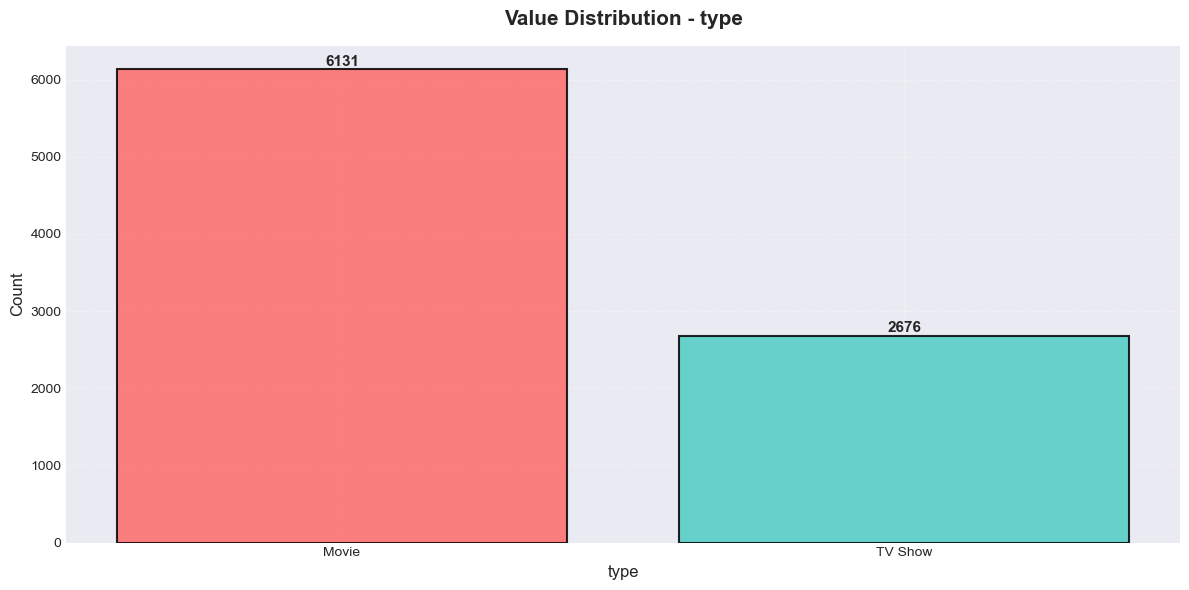

Column: TYPE
Số giá trị unique: 2

Top 10 giá trị phổ biến nhất:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


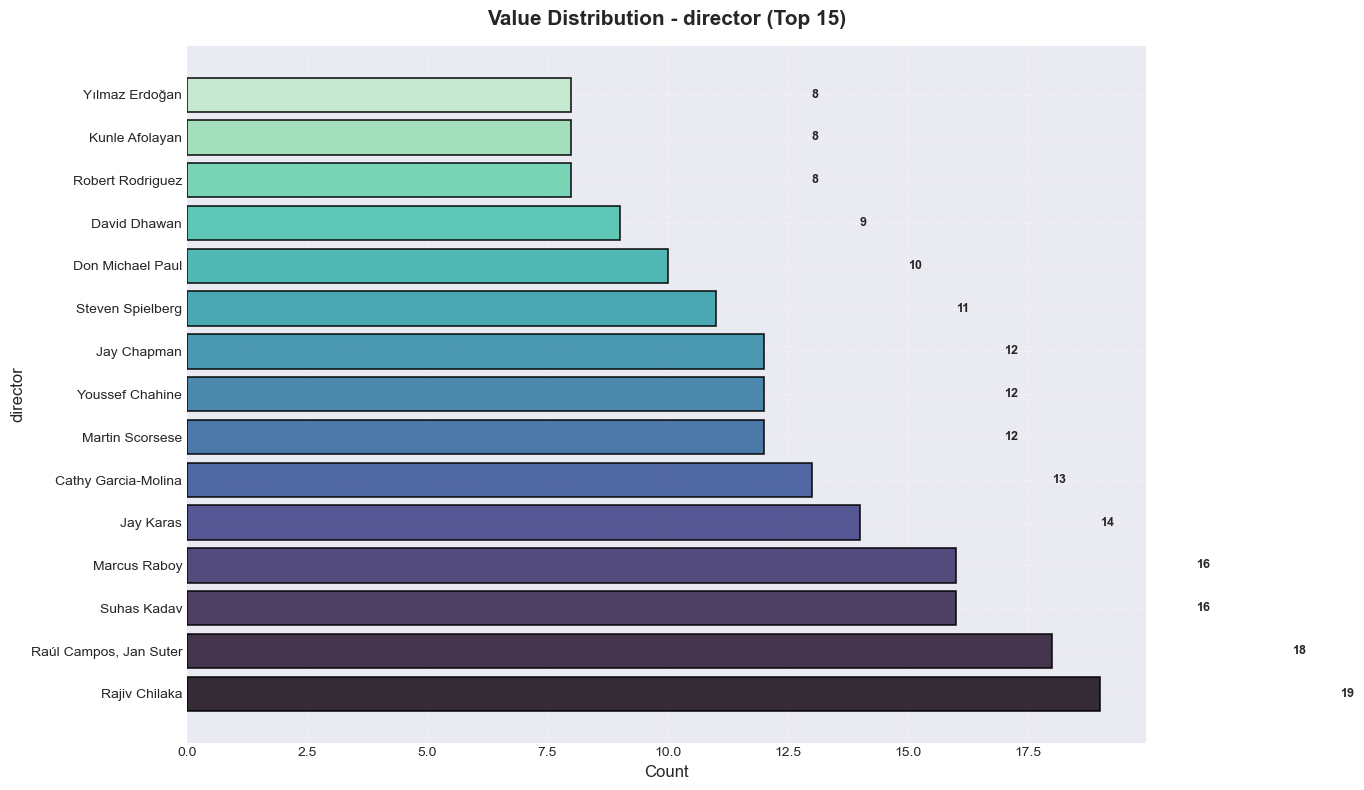

Column: DIRECTOR
Số giá trị unique: 4528

Top 10 giá trị phổ biến nhất:
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


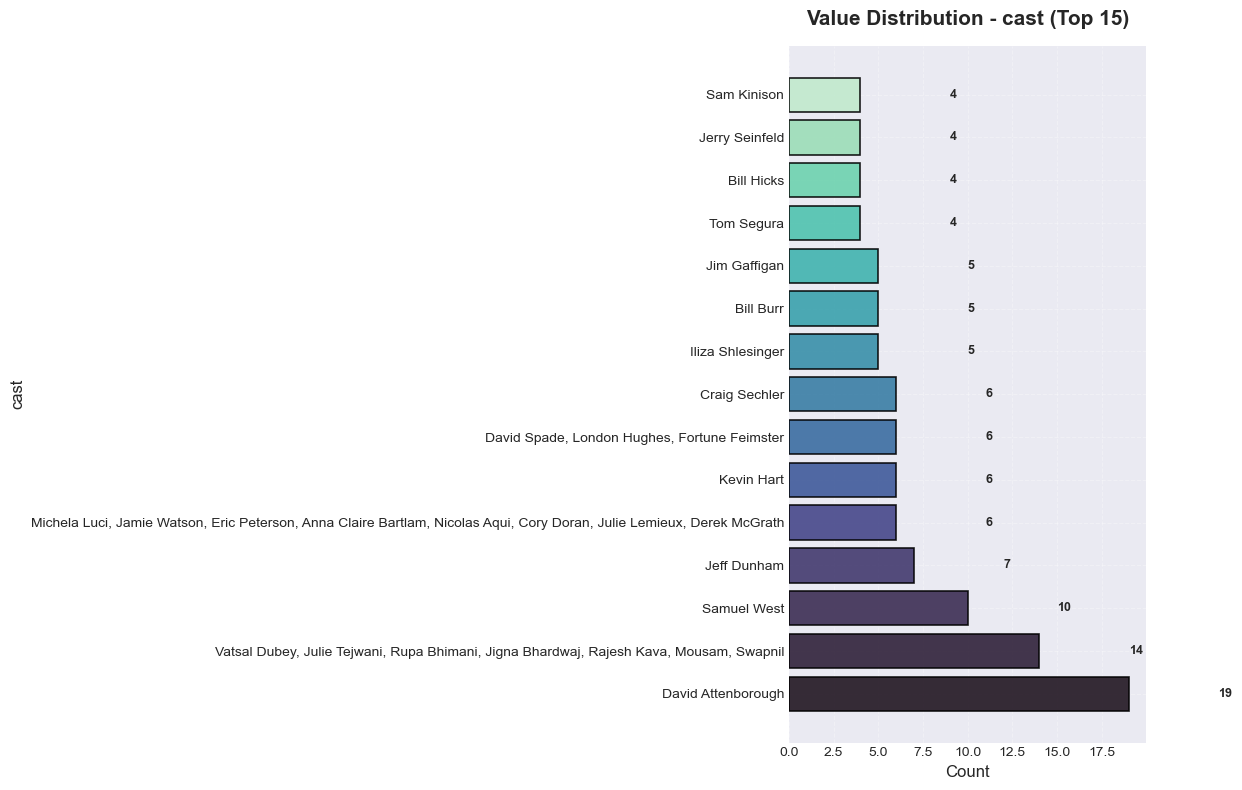

Column: CAST
Số giá trị unique: 7692

Top 10 giá trị phổ biến nhất:
cast
David Attenborough                                                                                                        19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                   14
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath     6
Kevin Hart                                                                                                                 6
David Spade, London Hughes, Fortune Feimster                                                                               6
Craig Sechler                                       

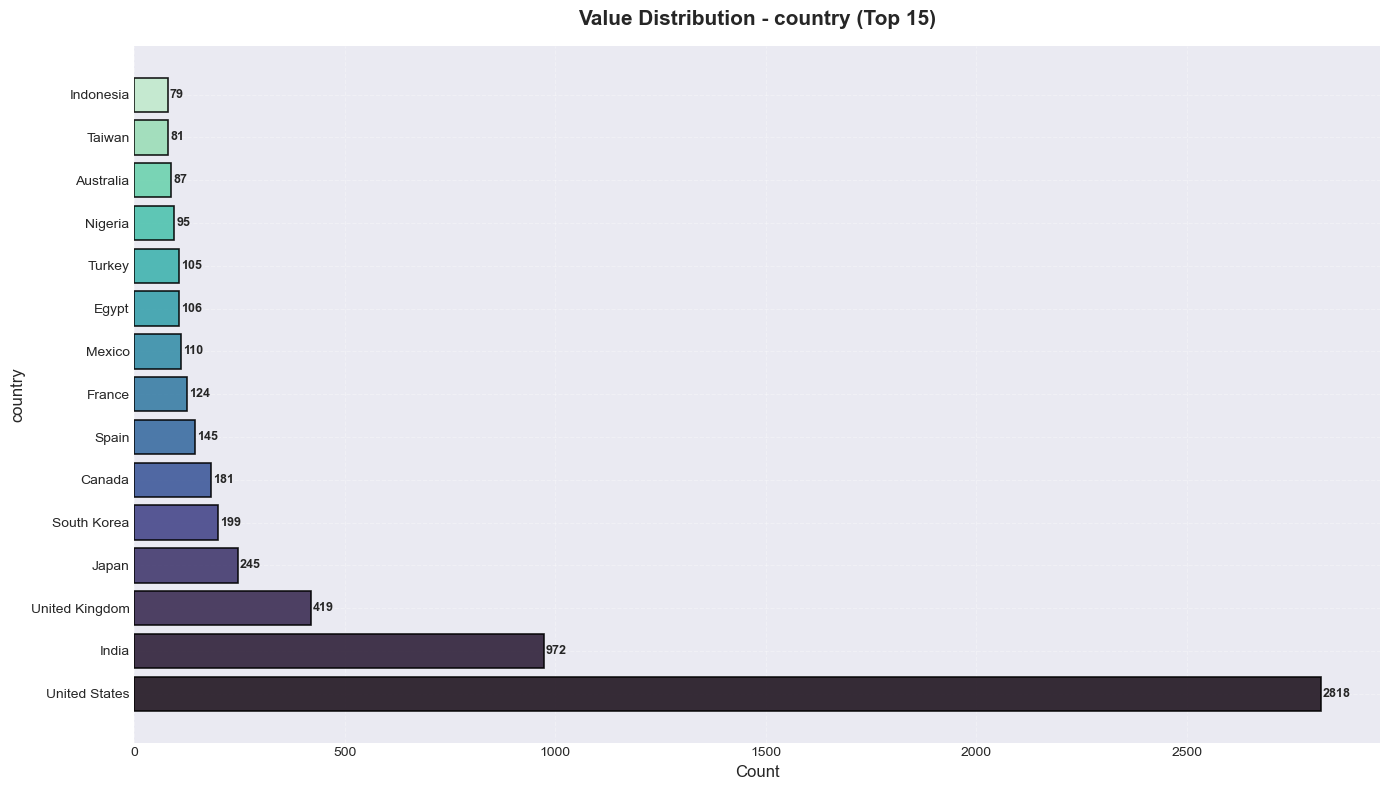

Column: COUNTRY
Số giá trị unique: 748

Top 10 giá trị phổ biến nhất:
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


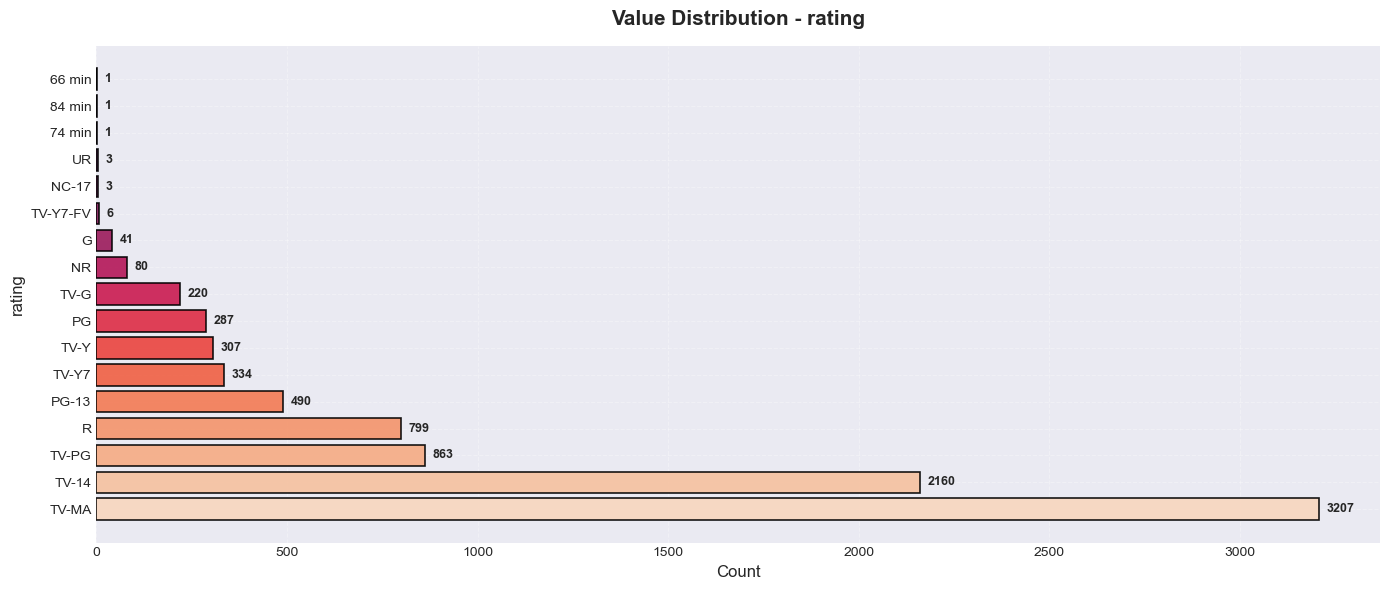

Column: RATING
Số giá trị unique: 17

Top 10 giá trị phổ biến nhất:
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64


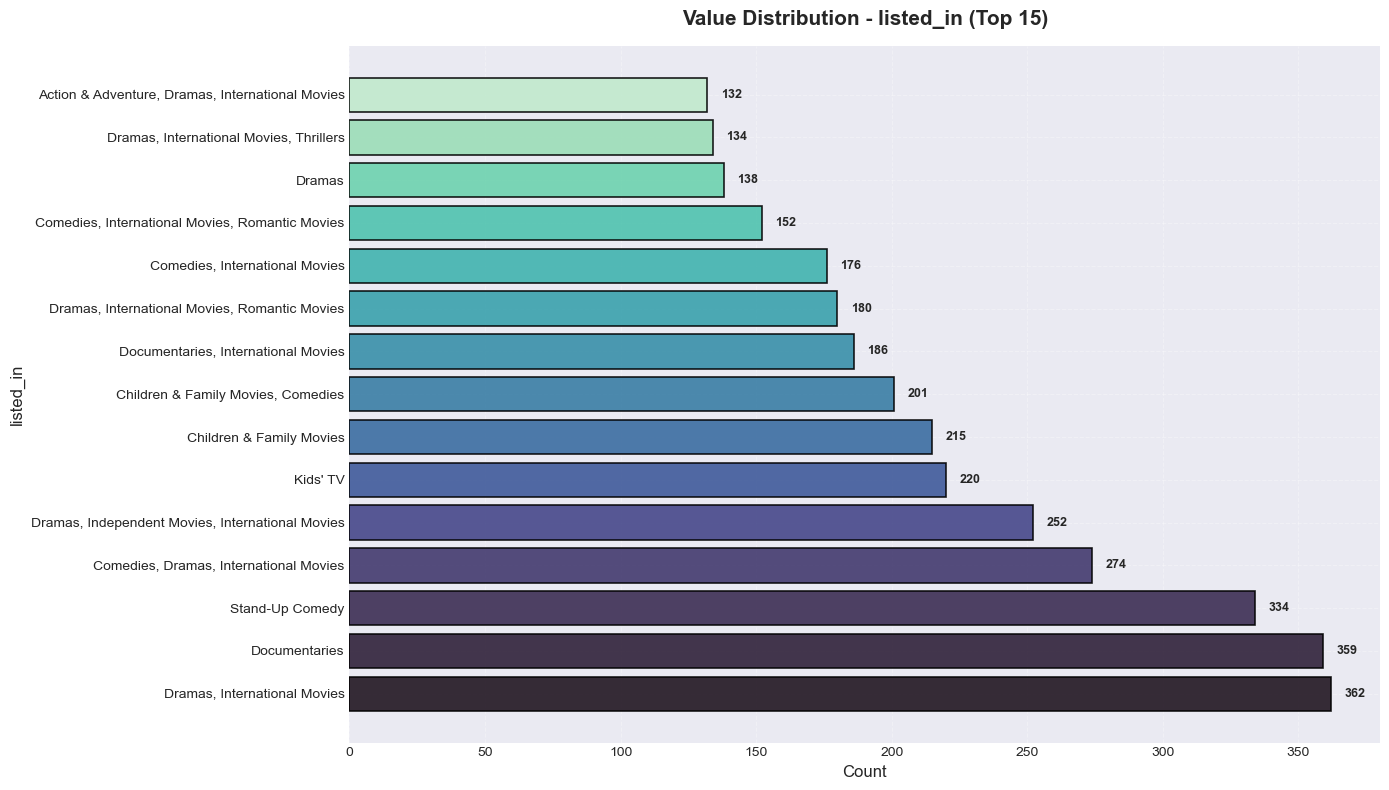

Column: LISTED_IN
Số giá trị unique: 514

Top 10 giá trị phổ biến nhất:
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


In [33]:
sns.set_palette("husl")
plt.style.use('seaborn-v0_8-darkgrid')
categorical_cols = ['type', 'director', 'cast', 'country', 'rating', 'listed_in']

summary = []
for col in categorical_cols:
	s = df[col]
	unique_count = s.nunique()
	top_values = s.value_counts().head(10)
	
	summary.append({
			"column": col,
			"unique_values": unique_count,
			"top_values": top_values.to_dict()
	})
	if unique_count > 100 and col != 'title':
		
		plt.figure(figsize=(14, 8))
		value_counts = s.value_counts().head(15)
		colors_palette = sns.color_palette("mako", len(value_counts))
		bars = plt.barh(value_counts.index, value_counts.values, color=colors_palette,
										edgecolor='black', linewidth=1.2, alpha=0.88)
		plt.title(f'Value Distribution - {col} (Top 15)', fontsize=15, fontweight='bold', pad=15)
		plt.xlabel('Count', fontsize=12)
		plt.ylabel(col, fontsize=12)
		
		for i, val in enumerate(value_counts.values):
			plt.text(val + 5, i, str(val), va='center', fontsize=9, fontweight='bold')
	
	elif col == 'listed_in':
		# Tách các thể loại vì mỗi phim có nhiều thể loại
		plt.figure(figsize=(14, 8))
		exploded_genres = s.str.split(', ').explode()
		genre_counts = exploded_genres.value_counts().head(15)
		
		colors_palette = sns.color_palette("viridis", len(genre_counts))
		bars = plt.barh(genre_counts.index, genre_counts.values, color=colors_palette,
										edgecolor='black', linewidth=1.2, alpha=0.9)
		plt.title(f'Value Distribution - {col} (Top 15)', fontsize=15, fontweight='bold', pad=15)
		plt.xlabel('Count', fontsize=12)
		plt.ylabel(col, fontsize=12)
		
		for i, val in enumerate(genre_counts.values):
			plt.text(val + 5, i, str(val), va='center', fontsize=9, fontweight='bold')
	
	elif col == 'country':
		plt.figure(figsize=(14, 8))
		country_counts = s.value_counts().head(15)
		colors_palette = sns.color_palette("coolwarm", len(country_counts))
		bars = plt.barh(country_counts.index, country_counts.values, color=colors_palette,
										edgecolor='black', linewidth=1.2, alpha=0.88)
		plt.title(f'Value Distribution - {col} (Top 15)', fontsize=15, fontweight='bold', pad=15)
		plt.xlabel('Count', fontsize=12)
		plt.ylabel(col, fontsize=12)
		
		for i, val in enumerate(country_counts.values):
			plt.text(val + 10, i, str(val), va='center', fontsize=9, fontweight='bold')
	
	elif col == 'rating':
		plt.figure(figsize=(14, 6))
		rating_counts = s.value_counts()
		colors_palette = sns.color_palette("rocket_r", len(rating_counts))
		bars = plt.barh(rating_counts.index, rating_counts.values, color=colors_palette,
										edgecolor='black', linewidth=1.2, alpha=0.9)
		plt.title(f'Value Distribution - {col}', fontsize=15, fontweight='bold', pad=15)
		plt.xlabel('Count', fontsize=12)
		plt.ylabel(col, fontsize=12)
		
		for i, val in enumerate(rating_counts.values):
			plt.text(val + 20, i, str(val), va='center', fontsize=9, fontweight='bold')
	
	else:
		plt.figure(figsize=(12, 6))
		value_counts = s.value_counts()
		colors_palette = ['#FF6B6B', '#4ECDC4'] if col == 'type' else sns.color_palette("husl", len(value_counts))
		bars = plt.bar(value_counts.index, value_counts.values, color=colors_palette,
									edgecolor='black', linewidth=1.5, alpha=0.85)
		plt.title(f'Value Distribution - {col}', fontsize=15, fontweight='bold', pad=15)
		plt.xlabel(col, fontsize=12)
		plt.ylabel('Count', fontsize=12)
		
		for i, val in enumerate(value_counts.values):
			plt.text(i, val + 50, str(val), ha='center', fontsize=11, fontweight='bold')
	
	plt.grid(alpha=0.3, linestyle='--')
	plt.tight_layout()
	plt.show()
	
	# 4. In thống kê
	print(f"Column: {col.upper()}")
	print(f"Số giá trị unique: {unique_count}")
	print(f"\nTop 10 giá trị phổ biến nhất:")
	print(top_values)
	



Dựa trên biểu đồ và thống kê ở trên:

1.  **Type (Loại nội dung):**
    *   Dữ liệu **không cân bằng**. **Movies** chiếm tỷ lệ áp đảo (khoảng 70%) so với **TV Shows** (30%).
    *   Netflix vẫn duy trì kho phim lẻ lớn, mặc dù xu hướng phim bộ đang thịnh hành.

2.  **Country (Quốc gia):**
    *   Thị trường **Mỹ (United States)** chiếm vị trí số 1 áp đảo, theo sau là **Ấn Độ (India)** và **Anh (United Kingdom)**.
    *   Sự phân bố địa lý không đồng đều, tập trung mạnh vào phương Tây và thị trường Bollywood.

3.  **Rating (Phân loại độ tuổi):**
    *   Hai nhãn phổ biến nhất là **TV-MA** (Dành cho người lớn) và **TV-14** (Trên 14 tuổi).
    *   Điều này khẳng định đối tượng mục tiêu chính của Netflix là người trưởng thành và thanh thiếu niên, thay vì trẻ em (các nhãn TV-Y, TV-G thấp hơn hẳn).
    *   Có lẽ dữ liệu có phần sai vì có cả các giá trị như '66 min', '74 min' hay '84 min' (sử lý ở sau)
		

4.  **Listed_in (Thể loại):**
    *   **International Movies**, **Dramas**, và **Comedies** là những từ khóa xuất hiện nhiều nhất.
    *   Người dùng Netflix có xu hướng tiếp cận nhiều với phim quốc tế và các thể loại giải trí nhẹ nhàng hoặc tâm lý.

5.  **Director & Cast:**
    *   Số lượng giá trị duy nhất (unique) rất cao. Phần lớn đạo diễn/diễn viên chỉ xuất hiện 1-2 lần.
    *   Tuy nhiên, vẫn có những cái tên xuất hiện dày đặc (như diễn viên Anupam Kher hay đạo diễn Rajiv Chilaka), thường đến từ thị trường Ấn Độ nơi sản lượng phim cao.

#### Data Quality: 

In [34]:
# What percentage of values are missing? 
categorical_cols = ['type', 'director', 'cast', 'country', 'rating', 'listed_in', 'date_added']
for col in categorical_cols:
	missing_count = df[col].isnull().sum()
	total_count = len(df)
	missing_ratio = missing_count / total_count
	print(f"Cột '{col}': {missing_count} giá trị bị thiếu ({missing_ratio:.2%})")

Cột 'type': 0 giá trị bị thiếu (0.00%)
Cột 'director': 2634 giá trị bị thiếu (29.91%)
Cột 'cast': 825 giá trị bị thiếu (9.37%)
Cột 'country': 831 giá trị bị thiếu (9.44%)
Cột 'rating': 4 giá trị bị thiếu (0.05%)
Cột 'listed_in': 0 giá trị bị thiếu (0.00%)
Cột 'date_added': 10 giá trị bị thiếu (0.11%)


Các cột như `director`, `cast` và `country` có tỉ lệ missing value khá là cao, trong khhi đó các cột như `rating` `date_added` thì có tỉ lệ missing rất thấp ở mức chấp nhận được

các cột còn lại không bị thiếu

Theo như các hiểu dồ histogram phía trên thì dường dư dữ liệu này thì các giá trị đều nhất quán, không có cái nào bị trùng về mặt ý nghĩa.

### Missing data analysis:

--- KHÁM PHÁ DỮ LIỆU BỊ THIẾU ---
            Total Missing  Percent (%)
director             2634    29.908028
country               831     9.435676
cast                  825     9.367549
date_added             10     0.113546
rating                  4     0.045418
duration                3     0.034064


C:\Users\ACER\AppData\Local\Temp\ipykernel_32448\3333965226.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y=missing_data['Percent (%)'], palette='Reds_r')


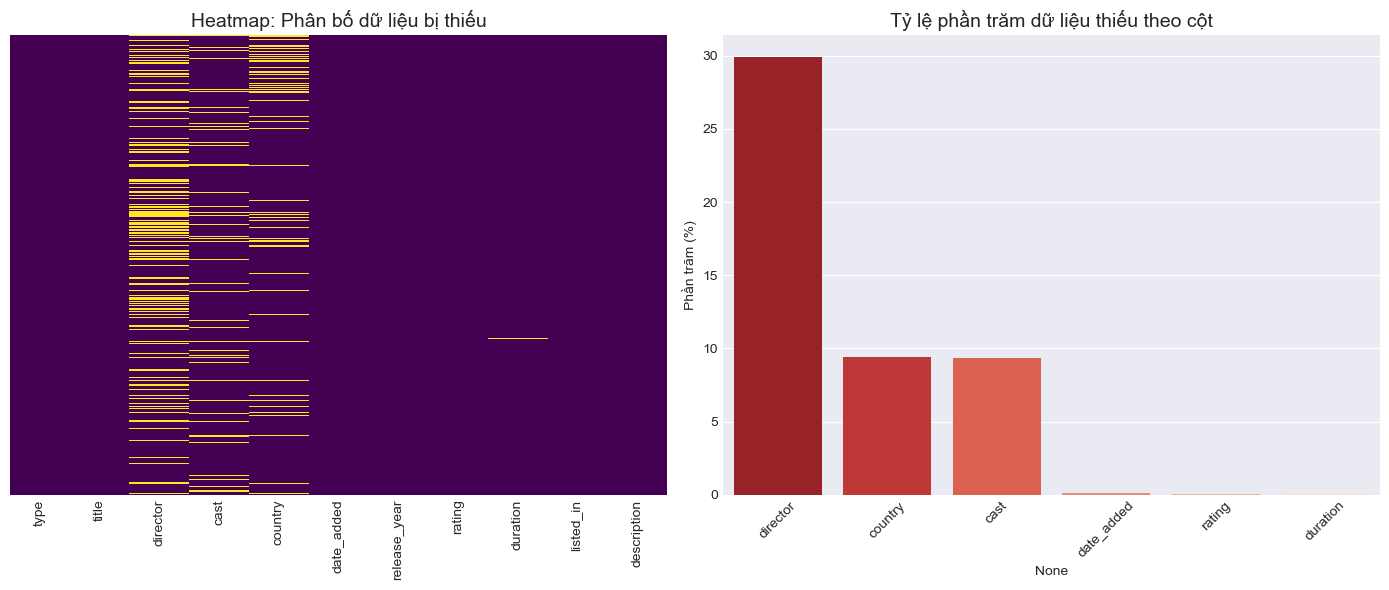

In [35]:
print("--- KHÁM PHÁ DỮ LIỆU BỊ THIẾU ---")
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([missing_count, missing_percent], axis=1, keys=['Total Missing', 'Percent (%)'])

missing_data = missing_data[missing_data['Total Missing'] > 0]
print(missing_data)


plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap: Phân bố dữ liệu bị thiếu', fontsize=14)


plt.subplot(1, 2, 2)
sns.barplot(x=missing_data.index, y=missing_data['Percent (%)'], palette='Reds_r')
plt.title('Tỷ lệ phần trăm dữ liệu thiếu theo cột', fontsize=14)
plt.ylabel('Phần trăm (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### Xử lý các giá trị thiếu

In [36]:
# Xử lý dữ liệu bị thiếu
# 1. Điền giá trị 'Unknown' cho các biến phân loại (Categorical)
cols_to_fill = ['director', 'cast', 'country']
for col in cols_to_fill:
	df[col].fillna('Unknown', inplace=True)
	print(f"-> Đã điền 'Unknown' cho cột: {col}")

# 2. Xóa các dòng thiếu dữ liệu ở các cột quan trọng khác
cols_to_drop = ['date_added', 'rating', 'duration']
before_rows = df.shape[0]
df.dropna(subset=cols_to_drop, inplace=True)
after_rows = df.shape[0]
print(f"-> Đã xóa {before_rows - after_rows} dòng thiếu dữ liệu ở {cols_to_drop}.")

# Kiểm tra lại lần cuối
print(f"\nKiểm tra lại dữ liệu thiếu: {df.isnull().sum().sum()} giá trị null còn lại.")

-> Đã điền 'Unknown' cho cột: director
-> Đã điền 'Unknown' cho cột: cast
-> Đã điền 'Unknown' cho cột: country
-> Đã xóa 17 dòng thiếu dữ liệu ở ['date_added', 'rating', 'duration'].

Kiểm tra lại dữ liệu thiếu: 0 giá trị null còn lại.


C:\Users\ACER\AppData\Local\Temp\ipykernel_32448\1486515492.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


**Nhận xét về Dữ liệu thiếu:**
* **Mức độ nghiêm trọng:** Biểu đồ nhiệt (Heatmap) cho thấy dữ liệu bị khuyết chủ yếu tập trung ở các cột thông tin bổ trợ (`director`, `cast`, `country`), tạo thành các vệt sáng rõ rệt. Cột `director` thiếu nhiều nhất (khoảng 30%), đây là thách thức lớn nếu muốn phân tích sâu về tác giả.
* **Tính toàn vẹn cốt lõi:** Các cột quan trọng cho bài toán kinh doanh như `rating` (đối tượng khán giả), `date_added` (thời gian) và `duration` (thời lượng) gần như nguyên vẹn (<1% missing). Điều này đảm bảo độ tin cậy cho các phân tích xu hướng ở phần sau.
* **Hiệu quả xử lý:** Việc thay thế bằng "Unknown" thay vì xóa bỏ giúp chúng ta giữ lại được hơn 30% lượng phim cho hệ thống gợi ý (Recommendation System), vì dù thiếu đạo diễn, phim đó vẫn có thể được gợi ý dựa trên mô tả hoặc thể loại.

In [37]:
#Kiểm tra xem cột rating còn lỗi dữ liệu không
df.loc[df['rating'].str.contains('min', na=False)]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


Không còn lỗi dữ liệu ở cột `rating` nữa

#### Relationships & Correlations

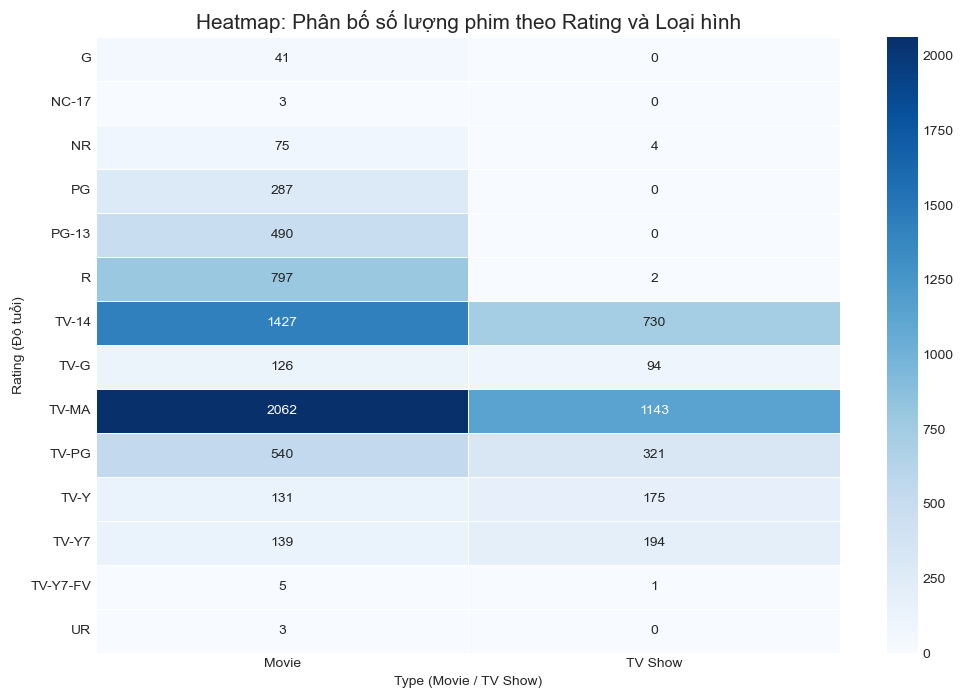

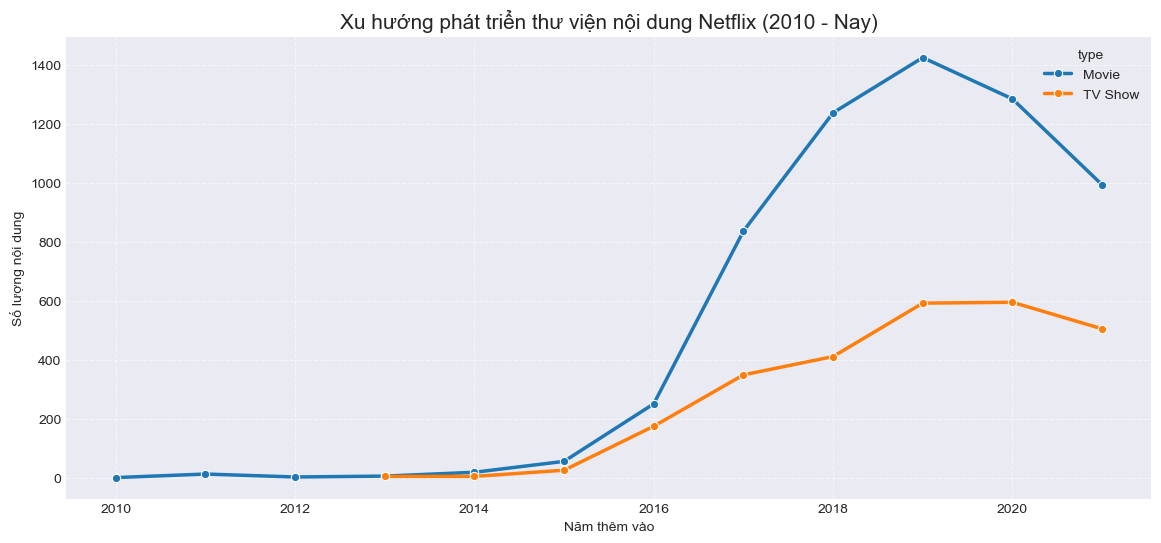

C:\Users\ACER\AppData\Local\Temp\ipykernel_32448\2046654697.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['type'] == 'TV Show'], x='duration_num',


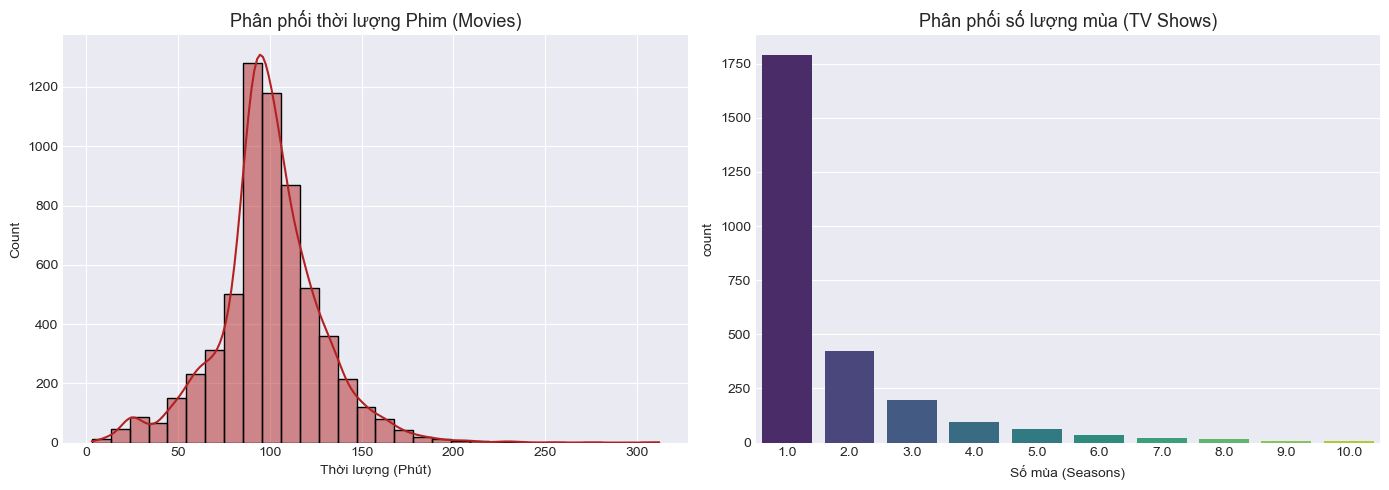

In [38]:
# A. Mối quan hệ giữa Rating (Độ tuổi) và Loại nội dung (Type)
rating_type_cross = pd.crosstab(df['rating'], df['type'])
plt.figure(figsize=(12, 8))
sns.heatmap(rating_type_cross, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Heatmap: Phân bố số lượng phim theo Rating và Loại hình', fontsize=15)
plt.ylabel('Rating (Độ tuổi)')
plt.xlabel('Type (Movie / TV Show)')
plt.show()

# B. Xu hướng thêm nội dung theo thời gian (Year Added Trend)

if not pd.api.types.is_datetime64_any_dtype(df['date_added']):
  df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), errors='coerce')
if 'year_added' not in df.columns:
  df['year_added'] = df['date_added'].dt.year
content_by_year = df.groupby(['year_added', 'type']).size().reset_index(name='count')
content_by_year = content_by_year[content_by_year['year_added'] >= 2010]

plt.figure(figsize=(14, 6))
sns.lineplot(data=content_by_year, x='year_added', y='count', hue='type',
             marker='o', linewidth=2.5, palette='tab10')
plt.title('Xu hướng phát triển thư viện nội dung Netflix (2010 - Nay)', fontsize=15)
plt.xlabel('Năm thêm vào')
plt.ylabel('Số lượng nội dung')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# C. Phân tích Thời lượng (Duration Analysis)
if 'duration_num' not in df.columns:
    df['duration_num'] = df['duration'].astype(str).str.extract('(\d+)').astype(float)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df[df['type'] == 'Movie'], x='duration_num',
             kde=True, color='firebrick', bins=30)
plt.title('Phân phối thời lượng Phim (Movies)', fontsize=13)
plt.xlabel('Thời lượng (Phút)')
plt.subplot(1, 2, 2)
top_seasons = df[df['type'] == 'TV Show']['duration_num'].value_counts().index[:10]
sns.countplot(data=df[df['type'] == 'TV Show'], x='duration_num',
              palette='viridis', order=top_seasons)
plt.title('Phân phối số lượng mùa (TV Shows)', fontsize=13)
plt.xlabel('Số mùa (Seasons)')

plt.tight_layout()
plt.show()

**Nhận xét về Mối quan hệ & Xu hướng:**

1.  **Chiến lược đối tượng (Rating vs Type):**
    * Heatmap chỉ ra vùng "nóng" nhất nằm ở `TV-MA` (Dành cho người lớn) và `TV-14` (Trên 14 tuổi). Netflix rõ ràng không chỉ là nền tảng cho trẻ em mà đang tập trung mạnh vào nội dung trưởng thành và gai góc hơn.
    * Tỷ lệ Phim lẻ (Movie) dán nhãn `TV-MA` cao vượt trội so với các nhãn khác.

2.  **Chu kỳ phát triển (Year Trend):**
    * Đường biểu đồ cho thấy giai đoạn "hoàng kim" về số lượng là 2016-2019, với độ dốc dựng đứng.
    * Sự sụt giảm từ 2020 trở đi phản ánh hai yếu tố: Tác động của đại dịch COVID-19 làm đình trệ sản xuất và sự thay đổi chiến lược của Netflix từ "số lượng" sang "chất lượng" (tập trung vào Netflix Originals kinh phí cao).

3.  **Cấu trúc nội dung (Duration):**
    * **Movies:** Phân phối chuẩn (hình chuông) với đỉnh ở 90-100 phút. Đây là "thời lượng vàng" của điện ảnh thương mại.
    * **TV Shows:** Biểu đồ lệch hẳn về phía trái (Right-skewed), với số lượng TV Show có "1 Season" chiếm áp đảo. Điều này ám chỉ tỷ lệ "hủy show" (cancellation rate) cao hoặc xu hướng sản xuất Limited Series (phim ngắn tập) đang lên ngôi.

#### Initial Observations & Insights

Sau quá trình khám phá dữ liệu (EDA), nhóm đúc kết các quan sát chính và định hướng triển khai như sau:

### 1. Hiện trạng & Xử lý Dữ liệu
* **Quy mô:** Dataset gồm **8,807** mẫu, đủ độ tin cậy để đại diện cho xu hướng nội dung đến năm 2021.
* **Chiến lược làm sạch:** Các cột Metadata quan trọng (`Director` thiếu ~30%, `Cast` & `Country` thiếu ~9%) được xử lý bằng phương pháp **Imputation** (gán nhãn "Unknown") nhằm bảo toàn dữ liệu đầu vào cho các mô hình Machine Learning, thay vì loại bỏ gây mất mát thông tin.

### 2. Các Insight Chiến lược Sơ bộ
* **Phân khúc Khán giả:** Netflix tập trung mạnh vào nhóm trưởng thành, với hơn **60%** nội dung dán nhãn `TV-MA` hoặc `TV-14`, thay vì định vị là truyền hình gia đình thuần túy.
* **Chuyển dịch Chất lượng:** Tốc độ ra mắt phim mới chững lại sau 2019, phản ánh sự chuyển hướng từ mở rộng số lượng sang đầu tư chiều sâu (Netflix Originals).
* **Tính Đào thải:** Đa số TV Show dừng lại ở Season 1, cho thấy môi trường cạnh tranh và sàng lọc nội dung rất khắc nghiệt.

### 3. Định hướng Phân tích & Kỹ thuật
Lộ trình nghiên cứu tiếp theo tập trung vào hai nhánh:

1.  **Phân tích Chiến lược (Strategic Analysis):**
    * So sánh thế mạnh nội dung giữa các "cường quốc" phim ảnh (Mỹ, Hàn, Nhật, Ấn Độ).
    * Phân tích chuỗi thời gian (Time-series) để tìm tính mùa vụ (Seasonality) trong lịch phát hành.
    * Phân khúc khán giả dựa trên tương quan Độ tuổi - Thời lượng.

2.  **Giải pháp Machine Learning (Recommendation System):**
    * **Mục tiêu:** Xây dựng hệ thống gợi ý tự động để giải quyết bài toán quá tải thông tin.
    * **Phương pháp:** **Content-Based Filtering** (Lọc theo nội dung).
    * **Lý do:** Khắc phục vấn đề "Cold Start" (gợi ý cho phim mới chưa có view) bằng cách tận dụng dữ liệu văn bản phong phú.
    * **Kỹ thuật:** Sử dụng NLP để làm sạch văn bản, chuyển đổi thành vector (TF-IDF/CountVectorizer) và đo lường độ tương đồng bằng Cosine Similarity.